In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as mo
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [32]:
data = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [33]:
pd.options.display.max_rows = 999
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [34]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [35]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [36]:
new = data.iloc[:,9:21]
new

,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


<Axes: >

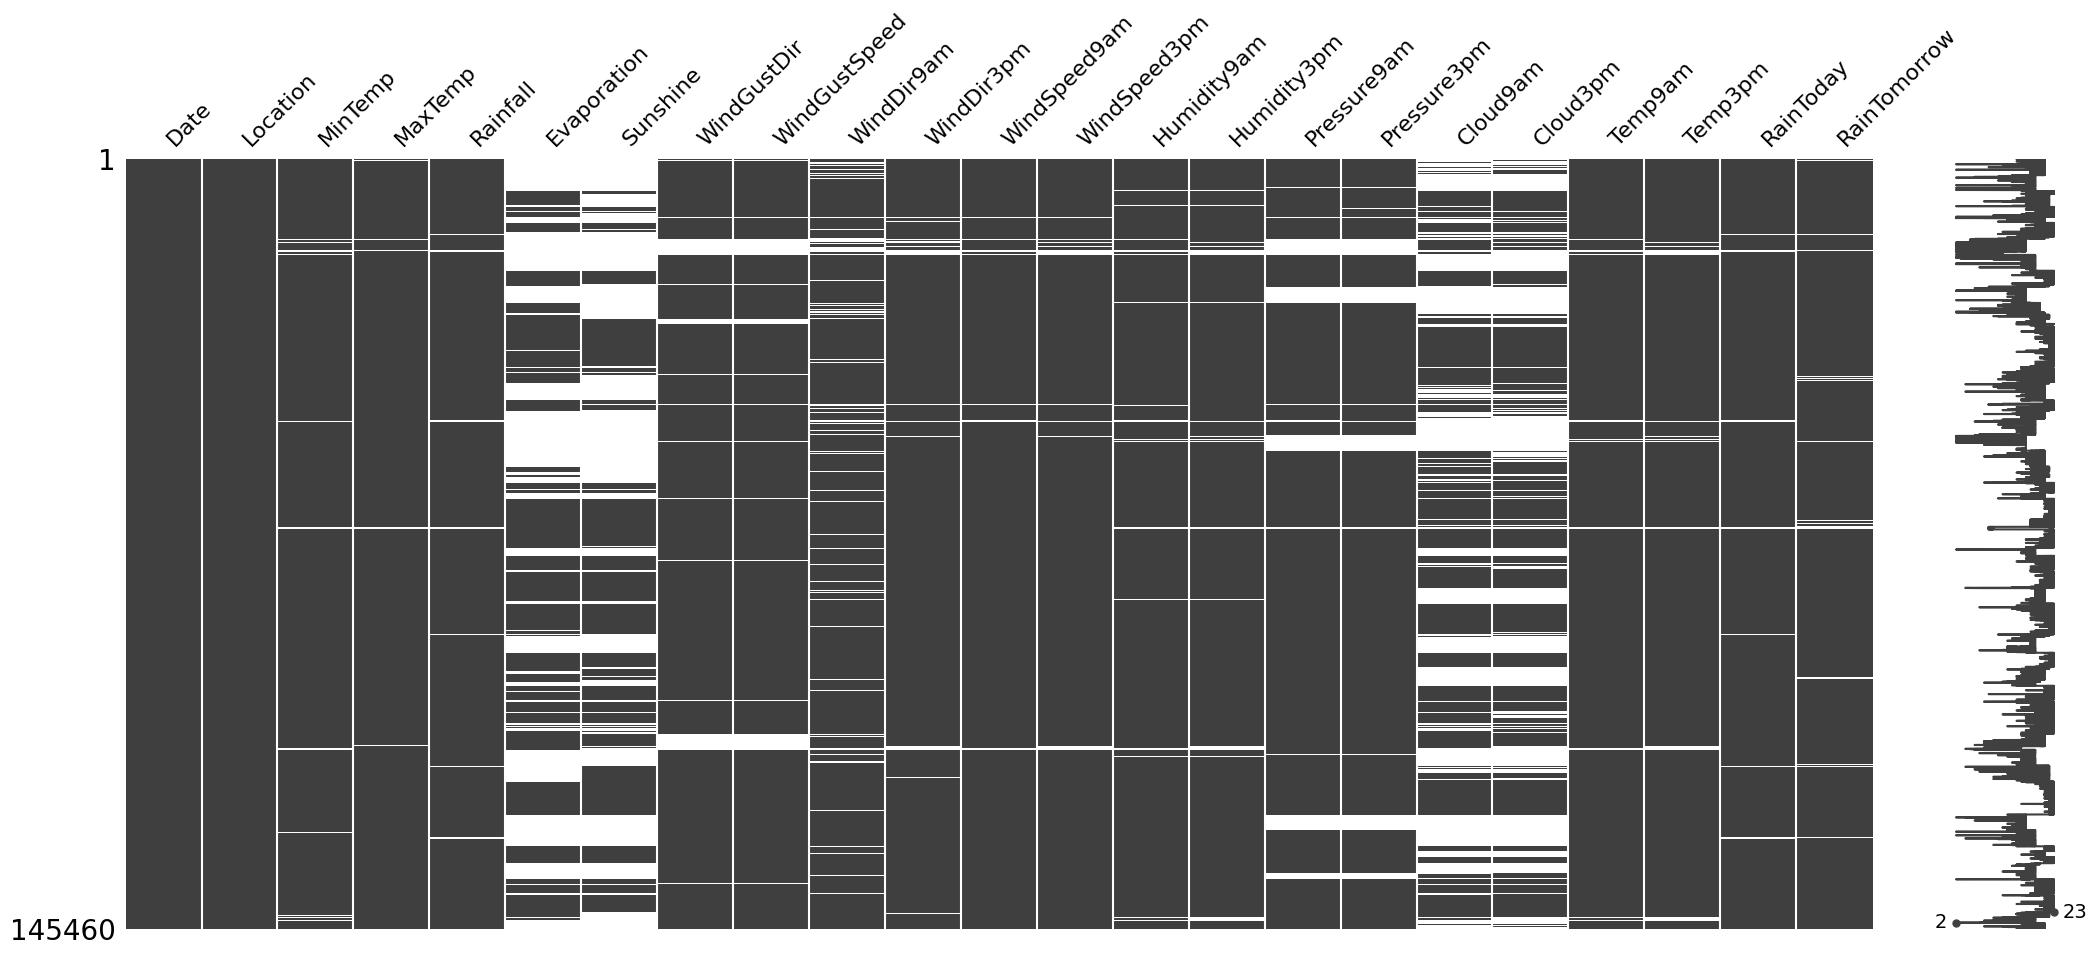

In [37]:
mo.matrix(data)

In [39]:
data['season'] = pd.to_datetime(data['Date'], format='%Y-%m-%d').dt.month.map({
    12: 'Summer', 1: 'Summer', 2: 'Summer',
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
})

In [40]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Summer
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,Summer
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,Summer
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,Summer
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,Winter
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,Winter
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,Winter
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,Winter


In [41]:
#data ['Sunshine'] = data['Sunshine'].fillna(
    #data.groupby('season')['Sunshine'].transform('median')
#)

In [44]:
numerical_df = data.select_dtypes(include=['number'])

In [45]:
numerical_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [46]:
corr_mat = numerical_df.corr()

In [47]:
import plotly.express as px
import pandas as pd


corr_matrix = numerical_df.corr()


fig = px.imshow(
    corr_matrix,
    text_auto=True,               
    aspect="auto",                
    color_continuous_scale='RdBu_r', 
    labels=dict(color="Correlation"), 
    title="Interactive Correlation Matrix"
)

fig.show()


In [48]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Summer
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,Summer
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,Summer
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,Summer
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,Winter
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,Winter
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,Winter
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,Winter


In [49]:
data["TempRange"] = data["MaxTemp"] - data["MinTemp"] 
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season,TempRange
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Summer,9.5
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,Summer,17.7
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,Summer,12.8
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,Summer,18.8
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Summer,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,Winter,20.6
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,Winter,21.7
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,Winter,21.5
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,Winter,19.2


In [51]:
from datetime import datetime as dt
data["Date"] = pd.to_datetime(data["Date"])
data["year"] = data["Date"].dt.year
data["month"] = data["Date"].dt.month
data["day"] = data["Date"].dt.day

In [52]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season,TempRange,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,NaN,16.9,21.8,No,No,Summer,9.5,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,17.2,24.3,No,No,Summer,17.7,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,2.0,21.0,23.2,No,No,Summer,12.8,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,18.1,26.5,No,No,Summer,18.8,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,8.0,17.8,29.7,No,No,Summer,14.8,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,NaN,10.1,22.4,No,No,Winter,20.6,2017,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,NaN,10.9,24.5,No,No,Winter,21.7,2017,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,NaN,12.5,26.1,No,No,Winter,21.5,2017,6,23
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,2.0,15.1,26.0,No,No,Winter,19.2,2017,6,24


In [58]:
data1 = data[['Sunshine', 'Cloud3pm']]
fig1 = px.scatter(
    data1,
    x='Sunshine',
    y='Cloud3pm',
    title='Sunshine vs Cloud Cover (3pm)',
    labels={
        'Sunshine': 'Sunshine (hours)',
        'Cloud3pm': 'Cloud Cover at 3pm (oktas)'
    },
    trendline='ols'   # regression line
)

fig1.show()

In [62]:
sliced_df = data[(data['day'] >= 17) & (data['day'] <= 27)]

In [61]:
sliced_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season,TempRange,year,month,day
45603,2007-11-17,Canberra,13.8,31.2,0.0,7.2,8.4,ESE,44.0,WSW,...,6.0,20.2,29.8,No,Yes,Spring,17.4,2007,11,17
45604,2007-11-18,Canberra,11.7,30.0,1.2,7.2,10.1,S,52.0,SW,...,5.0,20.1,28.6,Yes,No,Spring,18.3,2007,11,18
45605,2007-11-19,Canberra,12.4,32.3,0.6,7.4,13.0,E,39.0,NNE,...,3.0,20.2,31.2,No,No,Spring,19.9,2007,11,19
45606,2007-11-20,Canberra,15.6,33.4,0.0,8.0,10.4,NE,33.0,NNW,...,1.0,22.8,32.0,No,No,Spring,17.8,2007,11,20
45607,2007-11-21,Canberra,15.3,33.4,0.0,8.8,9.5,WNW,59.0,N,...,5.0,22.2,32.8,No,No,Spring,18.1,2007,11,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136070,2017-06-25,Launceston,1.8,12.8,0.0,NaN,NaN,NW,50.0,NNW,...,8.0,9.4,12.4,No,No,Winter,11.0,2017,6,25
139110,2017-06-25,AliceSprings,9.6,NaN,0.0,NaN,NaN,NaN,NaN,WSW,...,1.0,15.6,26.3,No,NaN,Winter,NaN,2017,6,25
142303,2017-06-25,Darwin,19.3,NaN,0.0,5.0,NaN,NaN,NaN,E,...,1.0,24.6,29.0,No,NaN,Winter,NaN,2017,6,25
143881,2017-06-25,Katherine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,Winter,NaN,2017,6,25


In [70]:
sliced_df['Location'].unique()

array(['Canberra', 'Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth',
       'Hobart', 'Darwin', 'Albury', 'Newcastle', 'Penrith', 'Wollongong',
       'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Cairns',
       'GoldCoast', 'Townsville', 'MountGambier', 'Albany', 'Launceston',
       'AliceSprings', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Richmond', 'SydneyAirport',
       'WaggaWagga', 'Williamtown', 'Sale', 'MelbourneAirport', 'Mildura',
       'Portland', 'Watsonia', 'Dartmoor', 'Nuriootpa', 'Woomera',
       'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'SalmonGums',
       'Walpole', 'Nhil', 'Katherine', 'Uluru'], dtype=object)

In [69]:
sliced_df['Location'].nunique()

49

In [74]:
selected_location = "Sydney"
location_df = sliced_df[sliced_df['Location'] == selected_location]
location_df = location_df.sort_values(by=['year', 'month', 'day'])
location_df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season,TempRange,year,month,day
30192,2008-02-17,Sydney,19.5,24.8,0.0,7.6,3.2,NaN,NaN,SE,...,7.0,21.8,23.4,No,No,Summer,5.3,2008,2,17
30193,2008-02-18,Sydney,18.6,25.3,0.0,4.2,4.5,NaN,NaN,SSE,...,6.0,21.2,23.8,No,No,Summer,6.7,2008,2,18
30194,2008-02-19,Sydney,19.0,24.8,0.0,5.2,7.5,NaN,NaN,WNW,...,7.0,20.8,23.4,No,No,Summer,5.8,2008,2,19
30195,2008-02-20,Sydney,18.3,26.4,0.0,4.6,11.1,NaN,NaN,W,...,1.0,21.3,25.2,No,No,Summer,8.1,2008,2,20
30196,2008-02-21,Sydney,20.6,26.8,0.0,6.8,6.4,NaN,NaN,WNW,...,7.0,22.1,24.9,No,No,Summer,6.2,2008,2,21
30197,2008-02-22,Sydney,19.1,25.4,0.4,4.4,9.4,NaN,NaN,WNW,...,1.0,22.3,24.9,No,No,Summer,6.3,2008,2,22
30198,2008-02-23,Sydney,20.5,26.0,0.0,6.6,12.2,NaN,NaN,WSW,...,1.0,22.5,24.0,No,No,Summer,5.5,2008,2,23
30199,2008-02-24,Sydney,16.5,28.3,0.0,8.6,12.0,NaN,NaN,WNW,...,0.0,21.2,26.1,No,No,Summer,11.8,2008,2,24
30200,2008-02-25,Sydney,20.5,24.2,0.0,8.6,1.5,NaN,NaN,E,...,7.0,21.6,23.5,No,No,Summer,3.7,2008,2,25
30201,2008-02-26,Sydney,19.3,26.2,0.0,3.6,8.4,NaN,NaN,WSW,...,6.0,23.0,25.8,No,Yes,Summer,6.9,2008,2,26


In [75]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 30192 to 33519
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1208 non-null   datetime64[ns]
 1   Location       1208 non-null   object        
 2   MinTemp        1206 non-null   float64       
 3   MaxTemp        1206 non-null   float64       
 4   Rainfall       1206 non-null   float64       
 5   Evaporation    1189 non-null   float64       
 6   Sunshine       1200 non-null   float64       
 7   WindGustDir    841 non-null    object        
 8   WindGustSpeed  841 non-null    float64       
 9   WindDir9am     1188 non-null   object        
 10  WindDir3pm     1201 non-null   object        
 11  WindSpeed9am   1199 non-null   float64       
 12  WindSpeed3pm   1201 non-null   float64       
 13  Humidity9am    1206 non-null   float64       
 14  Humidity3pm    1203 non-null   float64       
 15  Pressure9am    1201 n

<Axes: >

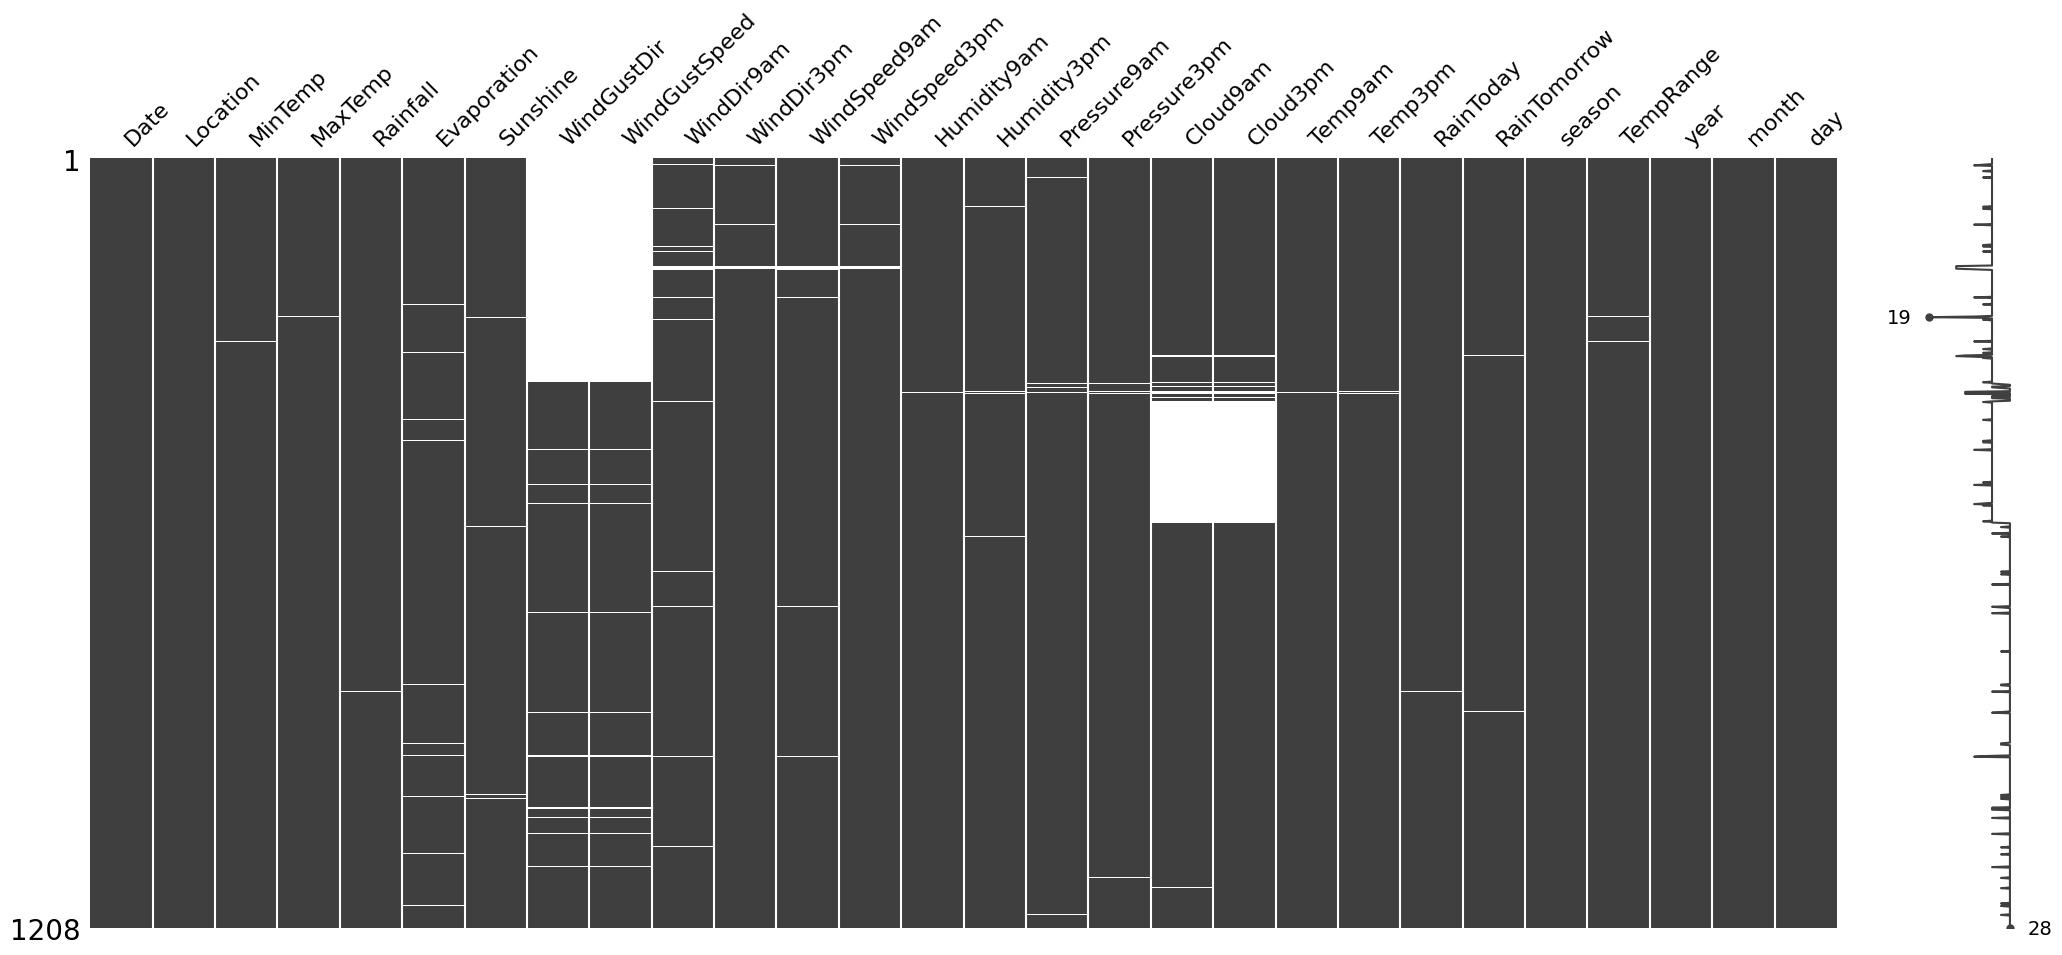

In [76]:
mo.matrix(location_df)

In [81]:
location_df["PressureDiff"] = location_df["Pressure9am"] - data["Pressure3pm"] 

location_df["HumidityDiff"] = location_df["Humidity9am"] - data["Humidity3pm"] 

location_df["TempDiff"] = location_df["Temp9am"] - data["Temp3pm"] 

location_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RainTomorrow,season,TempRange,year,month,day,PressureDiff,HumidityDiff,TempDiff
30192,2008-02-17,Sydney,19.5,24.8,0.0,7.6,3.2,NaN,NaN,SE,...,No,No,Summer,5.3,2008,2,17,1.6,1.0,-1.6
30193,2008-02-18,Sydney,18.6,25.3,0.0,4.2,4.5,NaN,NaN,SSE,...,No,No,Summer,6.7,2008,2,18,2.3,11.0,-2.6
30194,2008-02-19,Sydney,19.0,24.8,0.0,5.2,7.5,NaN,NaN,WNW,...,No,No,Summer,5.8,2008,2,19,2.6,14.0,-2.6
30195,2008-02-20,Sydney,18.3,26.4,0.0,4.6,11.1,NaN,NaN,W,...,No,No,Summer,8.1,2008,2,20,2.6,20.0,-3.9
30196,2008-02-21,Sydney,20.6,26.8,0.0,6.8,6.4,NaN,NaN,WNW,...,No,No,Summer,6.2,2008,2,21,1.7,24.0,-2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,No,No,Winter,11.0,2017,6,21,0.6,21.0,-7.4
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,No,No,Winter,9.9,2017,6,22,3.9,25.0,-7.7
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,No,No,Winter,8.3,2017,6,23,5.8,29.0,-7.1
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,No,No,Winter,9.2,2017,6,24,2.2,21.0,-6.6


In [85]:
location_df.drop("Pressure9am",axis = 1, inplace = True)
location_df.drop("Pressure3pm",axis = 1, inplace = True)
location_df.drop("Humidity9am",axis = 1, inplace = True)
location_df.drop("Humidity3pm",axis = 1, inplace = True)
location_df.drop("Temp9am",axis = 1, inplace = True)
location_df.drop("Temp3pm",axis = 1, inplace = True)
location_df

KeyError: "['Pressure9am'] not found in axis"

In [86]:
location_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RainTomorrow,season,TempRange,year,month,day,PressureDiff,HumidityDiff,TempDiff
30192,2008-02-17,Sydney,19.5,24.8,0.0,7.6,3.2,NaN,NaN,SE,...,No,No,Summer,5.3,2008,2,17,1.6,1.0,-1.6
30193,2008-02-18,Sydney,18.6,25.3,0.0,4.2,4.5,NaN,NaN,SSE,...,No,No,Summer,6.7,2008,2,18,2.3,11.0,-2.6
30194,2008-02-19,Sydney,19.0,24.8,0.0,5.2,7.5,NaN,NaN,WNW,...,No,No,Summer,5.8,2008,2,19,2.6,14.0,-2.6
30195,2008-02-20,Sydney,18.3,26.4,0.0,4.6,11.1,NaN,NaN,W,...,No,No,Summer,8.1,2008,2,20,2.6,20.0,-3.9
30196,2008-02-21,Sydney,20.6,26.8,0.0,6.8,6.4,NaN,NaN,WNW,...,No,No,Summer,6.2,2008,2,21,1.7,24.0,-2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,No,No,Winter,11.0,2017,6,21,0.6,21.0,-7.4
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,No,No,Winter,9.9,2017,6,22,3.9,25.0,-7.7
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,No,No,Winter,8.3,2017,6,23,5.8,29.0,-7.1
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,No,No,Winter,9.2,2017,6,24,2.2,21.0,-6.6


In [87]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 30192 to 33519
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1208 non-null   datetime64[ns]
 1   Location       1208 non-null   object        
 2   MinTemp        1206 non-null   float64       
 3   MaxTemp        1206 non-null   float64       
 4   Rainfall       1206 non-null   float64       
 5   Evaporation    1189 non-null   float64       
 6   Sunshine       1200 non-null   float64       
 7   WindGustDir    841 non-null    object        
 8   WindGustSpeed  841 non-null    float64       
 9   WindDir9am     1188 non-null   object        
 10  WindDir3pm     1201 non-null   object        
 11  WindSpeed9am   1199 non-null   float64       
 12  WindSpeed3pm   1201 non-null   float64       
 13  Cloud9am       1004 non-null   float64       
 14  Cloud3pm       1005 non-null   float64       
 15  RainToday      1206 n

In [88]:
import plotly.graph_objects as go

df_sorted = location_df.sort_values('TempRange')

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_sorted['TempRange'],
    y=df_sorted['PressureDiff'],
    mode='lines+markers',
    name='Pressure Difference',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=df_sorted['TempRange'],
    y=df_sorted['HumidityDiff'],
    mode='lines+markers',
    name='Humidity Difference',
    yaxis='y2'
))

fig.update_layout(
    title='Pressure & Humidity Difference vs Temperature Range',
    xaxis_title='Temperature Range (°C)',
    yaxis=dict(
        title='Pressure Difference (hPa)',
        side='left'
    ),
    yaxis2=dict(
        title='Humidity Difference (%)',
        overlaying='y',
        side='right'
    )
)

fig.show()
